<a href="https://colab.research.google.com/github/sivaramanrajagopal/myNLP60dayprogress/blob/main/Day18_26022022_NLP_Text_Classificationproject_Defect_Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
upload=files.upload()

Saving Triage_test_clean.csv to Triage_test_clean.csv


In [5]:
df= pd.read_csv("Triage_test_clean.csv",encoding='latin-1')

In [6]:
df.head()

,Category,Sub-Category,Incident Summary
0,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
1,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
2,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
3,API,TRaMS â Onboarding,Addition of new partner schemes on to TRAMS
4,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS


In [7]:
df['incident'] = df['Incident Summary']
df['subc']= df['Category']


In [8]:
df

,Category,Sub-Category,Incident Summary,incident,subc
0,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS,TRAMS - CHANGE OF STATUS,API
1,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS,TRAMS - CHANGE OF STATUS,API
2,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS,TRAMS - CHANGE OF STATUS,API
3,API,TRaMS â Onboarding,Addition of new partner schemes on to TRAMS,Addition of new partner schemes on to TRAMS,API
4,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS,TRAMS - CHANGE OF STATUS,API
...,...,...,...,...,...
534,Digital,CDD,C106292SR6 - MR SAM THOMPSON,C106292SR6 - MR SAM THOMPSON,Digital
535,Digital,DSS,"The customer gets the message ""this Agreement ...","The customer gets the message ""this Agreement ...",Digital
536,Digital,Other,Notification Service has a Root redirection re...,Notification Service has a Root redirection re...,Digital
537,Digital,CDD,UnavailableExport (65).xlsx,UnavailableExport (65).xlsx,Digital


In [ ]:
from io import StringIO
col = ['subc', 'incident']
df = df[col]
df = df[pd.notnull(df['incident'])]
df.columns = ['subc', 'incident']
df['category_id'] = df['subc'].factorize()[0]
category_id_df = df[['subc', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'subc']].values)
df.head()

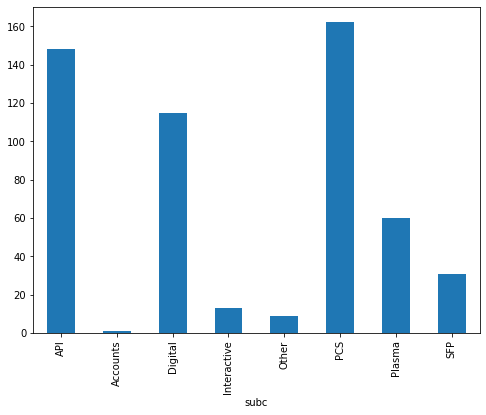

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('subc').incident.count().plot.bar(ylim=0)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [23]:
X = df['incident']

In [25]:
y = df['subc']

Using multinomial

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['incident'], df['subc'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

Prediction using multinomial

In [12]:
print(clf.predict(count_vect.transform(["unavailable reviews 0601"])))

['Digital']


Model Selection

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.incident).toarray()
labels = df.category_id
features.shape

(539, 119)

In [14]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for subc, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(subc))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'API':
  . Most correlated unigrams:
. file
. trams
  . Most correlated bigrams:
. trams change
. change status
# 'Accounts':
  . Most correlated unigrams:
. trams
. fw
  . Most correlated bigrams:
. trams change
. change status
# 'Digital':
  . Most correlated unigrams:
. cdd
. dss
  . Most correlated bigrams:
. add agreement
. dss add
# 'Interactive':
  . Most correlated unigrams:
. unable
. interactive
  . Most correlated bigrams:
. trams change
. change status
# 'Other':
  . Most correlated unigrams:
. renewal
. convert
  . Most correlated bigrams:
. trams change
. change status
# 'PCS':
  . Most correlated unigrams:
. fw
. administrator
  . Most correlated bigrams:
. administrator log
. reinstate administrator
# 'Plasma':
  . Most correlated unigrams:
. transaction
. plasma
  . Most correlated bigrams:
. reference numbers
. plasma reference
# 'SFP':
  . Most correlated unigrams:
. bau
. sfp
  . Most correlated bigrams:
. new user
. sfp bau


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


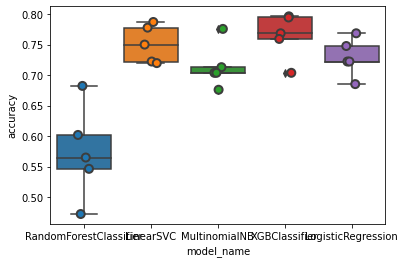

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    XGBClassifier(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.751333
LogisticRegression        0.729162
MultinomialNB             0.714399
RandomForestClassifier    0.573486
XGBClassifier             0.764434
Name: accuracy, dtype: float64

Model Evaulation

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',LogisticRegression())])
text_clf.fit(X_train,y_train)




Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

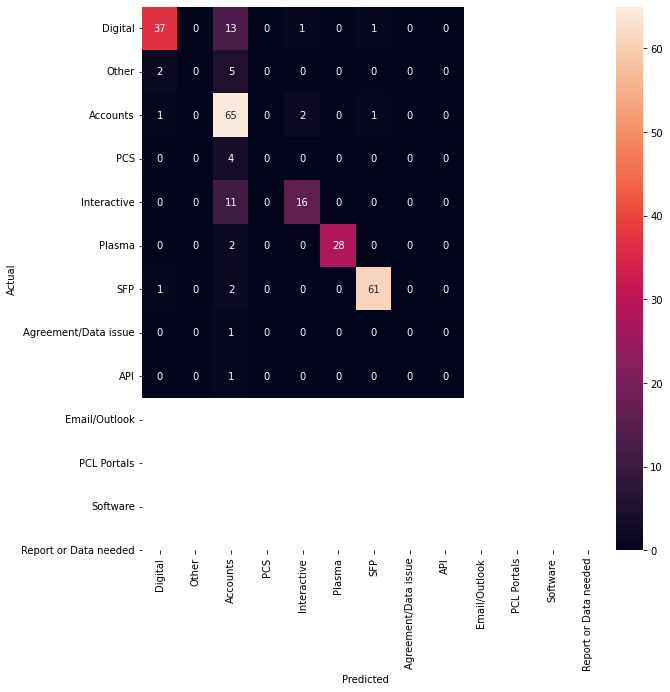

In [99]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.subc.values, yticklabels=category_id_df.subc.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

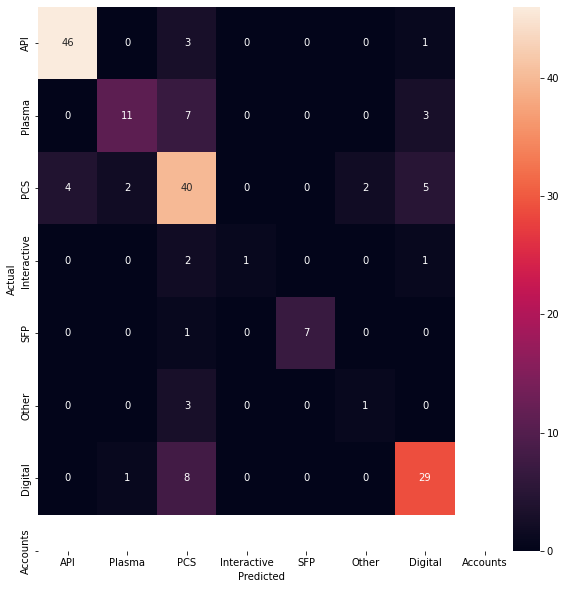

In [17]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.subc.values, yticklabels=category_id_df.subc.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['subc'].unique()))


ValueError: ignored

In [32]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 1:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['subc', 'incident']])
      print('')

'Other' predicted as 'Digital' : 3 examples.


,subc,incident
628,Other,T2 AZ CDD issues
231,Other,FW: Special Characters in client name
700,Other,Core CDD fields not being updated



'Accounts' predicted as 'Digital' : 2 examples.


,subc,incident


IndexError: ignored

In [20]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'API':
  . Top unigrams:
       . trams
       . communisis
  . Top bigrams:
       . recourse bounce
       . id secret
# 'Accounts':
  . Top unigrams:
       . 21
       . message
  . Top bigrams:
       . 10 21
       . recourse bounce
# 'Digital':
  . Top unigrams:
       . dss
       . blacklist
  . Top bigrams:
       . online account
       . cdd id
# 'Interactive':
  . Top unigrams:
       . interactive
       . details
  . Top bigrams:
       . hpx file
       . warning alert
# 'Other':
  . Top unigrams:
       . convert
       . reference
  . Top bigrams:
       . message agreement
       . signed trying
# 'PCS':
  . Top unigrams:
       . administrator
       . failure
  . Top bigrams:
       . change bank
       . administrator log
# 'Plasma':
  . Top unigrams:
       . plasma
       . transaction
  . Top bigrams:
       . plasma reference
       . reference numbers
# 'SFP':
  . Top unigrams:
       . sfp
       . bau
  . Top bigrams:
       . new user
       . sfp bau


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [28]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',LinearSVC())])

In [29]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [30]:
X_test

486                DSS - Please Add Agreement D100415EKO
73     HPX File Download - MigratedRIE100629672_20211...
349    HPX File Download - MigratedRUK100813520_20211...
86     HPX File Download - MigratedNUK100648735_20211...
457                           C101979HR9 - MR PAUL COWIE
                             ...                        
93     HPX File Download - MigratedRUK103052089_20211...
325    SFP - 320525-A4-S2  Cannot locate the MTA lett...
180    Fresh batch files failed due to Incorrect Bran...
331                    RE: Recourse Bounce Back 01.10.21
538                          C100309KN1 - MR BILL BOWLES
Name: incident, Length: 108, dtype: object

In [31]:
predictions = text_clf.predict(X_test)

In [32]:
X_test

486                DSS - Please Add Agreement D100415EKO
73     HPX File Download - MigratedRIE100629672_20211...
349    HPX File Download - MigratedRUK100813520_20211...
86     HPX File Download - MigratedNUK100648735_20211...
457                           C101979HR9 - MR PAUL COWIE
                             ...                        
93     HPX File Download - MigratedRUK103052089_20211...
325    SFP - 320525-A4-S2  Cannot locate the MTA lett...
180    Fresh batch files failed due to Incorrect Bran...
331                    RE: Recourse Bounce Back 01.10.21
538                          C100309KN1 - MR BILL BOWLES
Name: incident, Length: 108, dtype: object

In [33]:
y_test

486    Digital
73         API
349        API
86         API
457    Digital
        ...   
93         API
325        SFP
180        PCS
331        PCS
538    Digital
Name: subc, Length: 108, dtype: object

In [34]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [35]:
print(confusion_matrix(y_test,predictions))

[[36  0  1  0  3  0  0]
 [ 0 21  0  0  1  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  0  0  2  0  0]
 [ 3  4  0  1 20  0  0]
 [ 0  0  0  0  3  6  0]
 [ 0  0  0  0  0  0  5]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         API       0.90      0.90      0.90        40
     Digital       0.84      0.95      0.89        22
 Interactive       0.00      0.00      0.00         1
       Other       0.00      0.00      0.00         3
         PCS       0.67      0.71      0.69        28
      Plasma       1.00      0.67      0.80         9
         SFP       1.00      1.00      1.00         5

    accuracy                           0.81       108
   macro avg       0.63      0.61      0.61       108
weighted avg       0.81      0.81      0.81       108



In [37]:
print(accuracy_score(y_test,predictions))

0.8148148148148148


In [38]:
# real review from internet
text_clf.predict(["SFP- Amend pay sched and take out of default - 330632-A4-S1"])

array(['SFP'], dtype=object)

In [39]:
df["subc"].value_counts()

PCS            162
API            148
Digital        115
Plasma          60
SFP             31
Interactive     13
Other            9
Accounts         1
Name: subc, dtype: int64

In [83]:
from google.colab import files
upload=files.upload()

Saving Triage_test_clean.csv to Triage_test_clean.csv


In [84]:
df1= pd.read_csv("Triage_test_clean.csv",encoding='latin-1')

In [85]:
df1.head()

,Category,Sub-Category,Incident Summary
0,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
1,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
2,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS
3,API,TRaMS â Onboarding,Addition of new partner schemes on to TRAMS
4,API,TRaMS â Onboarding,TRAMS - CHANGE OF STATUS


In [86]:
df1.isnull().sum()

Category            0
Sub-Category        0
Incident Summary    0
dtype: int64

In [87]:
len(df1)

539

In [88]:

org_tweet= df1['Incident Summary']
org_tweet

0                               TRAMS - CHANGE OF STATUS
1                               TRAMS - CHANGE OF STATUS
2                               TRAMS - CHANGE OF STATUS
3            Addition of new partner schemes on to TRAMS
4                               TRAMS - CHANGE OF STATUS
                             ...                        
534                         C106292SR6 - MR SAM THOMPSON
535    The customer gets the message "this Agreement ...
536    Notification Service has a Root redirection re...
537                          UnavailableExport (65).xlsx
538                          C100309KN1 - MR BILL BOWLES
Name: Incident Summary, Length: 539, dtype: object

In [89]:
new_pred = text_clf.predict(org_tweet)

In [92]:
org_tweet[350]

'HPX File Download - MigratedRUK100827363_20211008062500_em.REC - WARNING ALERT'

In [93]:
new_pred[350]

'API'

In [ ]:
newy_test = df1['Incident Summary']
newy_test

In [ ]:
print(confusion_matrix(newy_test,new_pred))

In [ ]:
print(classification_report(newy_test,new_pred))

In [ ]:
print(accuracy_score(newy_test,new_pred))